In [26]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_wo_cov = "../data/Bayesianneuralnet_stockmarket/code/datasets"
data_wh_cov = "../data/Bayesianneuralnet_stockmarket/code/cov/data/"

In [49]:
def get_orig(sig, shift=2):
    """
    Retrieve original time series
    """
    return np.concatenate((sig[0,:].ravel(), sig[1:,-shift:].ravel()))

def get_data(basename, dirname):
    """
    Load stock matrix data
    """
    return np.loadtxt(open(os.path.join(dirname, basename)))

def list_txt(dirname):
    return [os.path.join(dirname,f) for f in os.listdir(dirname) if ".txt" in f]

def fname(path):
    fn = os.path.basename(path)
    name = fn.split(".")[0]
    return name

def plot_stock(filepath, title=""):
    data = np.loadtxt(filepath)
    series = get_orig(data)
    fig, ax = plt.subplots()
    ax.plot(series)
    ax.set_xlabel("Time")
    ax.set_ylabel("A.U.")
    
    if title=="":
        ax.set_title(os.path.basename(filepath[:-4]))
    else:
        ax.set_title(title)
        
    return fig, ax

## Dataset before COVID

In [39]:
fwocs = list_txt(data_wo_cov)

fwocs

['../data/Bayesianneuralnet_stockmarket/code/datasets/CBA.AX_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/DAI.DE_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/DAI.DE_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/MMM8_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/CBA.AX_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/CBA.AX_1_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/DAI.DE_1_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/CBA.AX_1_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/MMM8_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/600118.SS_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/600118.SS_1_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/600118.SS_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/datasets/DAI.DE_1_train.txt',
 '../data/Bayesianneuralnet_stockmarket/cod

In [40]:
fwhcs = list_txt(data_wh_cov)

fwhcs

['../data/Bayesianneuralnet_stockmarket/code/cov/data/DAI.DE covid_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/600118.SS_covid_half_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/MMM covid_half_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/600118.SS_covid_half_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/DAI.DE covid_half_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/DAI.DE covid_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/CBA.AX covid_half_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/MMM_covid_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/600118.SS covid_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/DAI.DE covid_half_test.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/CBA.AX covid_train.txt',
 '../data/Bayesianneuralnet_stockmarket/code/cov/data/MMM_covid_train.txt',
 '../data/Bayesianneuralnet_

In [52]:
fwhcs[11]

'../data/Bayesianneuralnet_stockmarket/code/cov/data/MMM_covid_train.txt'

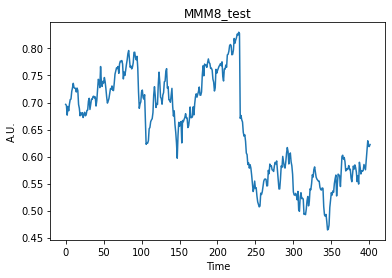

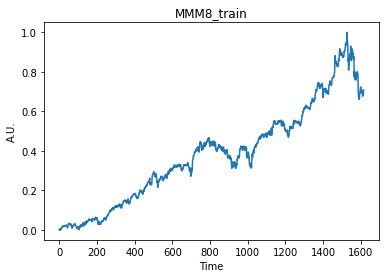

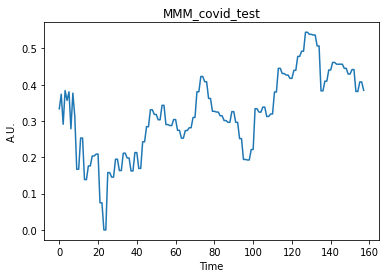

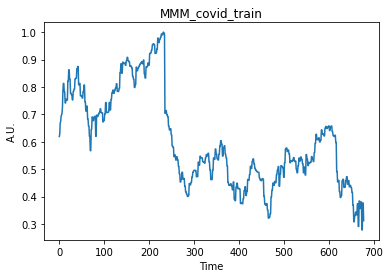

In [53]:
for d in [fwocs[3], fwocs[8], fwhcs[7], fwhcs[11]]:
    f, ax = plot_stock(d)
    f.savefig("../img/{}.pdf".format(fname(d)), bbox_inches= "tight")